In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
g = 9.81          #m/s²
p = 1.091         #kg/m³ is the average air density (assumed constant throughout flight)
R = 0.5           #m, radius of the corss sectional area of the rocket
A = numpy.pi*R**(2.0) #is the maximum cross sectional area of the rocket
m_s = 50.0            #kg is the mass of the rocket shell
v_e = 325.0         #m/s is the exhaust speed
C_D = 0.15        #is the drag coefficient
m_p_0 = 100.0       #kg at time t=0 is the initial weight of the rocket propellant
v_0 = 0.0           #initial speed
h_0 = 0.0           # intial altitude 

In [3]:
def f(u):
   
    
    v = u[1]
    h = u[0]
    
    return numpy.array([v,(-g) + ((v_m_p*v_e)-(0.5)*p*v*abs(v)*A*C_D)/(m_s + m_p)])
 


In [6]:
T = 100.0                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

In [7]:
def euler_step(u, f, dt):
    
    return u + dt * f(u)

In [8]:
u = numpy.empty((N, 2))
u[0]= numpy.array([h_0, v_0])
for n in range(N-1):
    if n<50:
        v_m_p = 20.0
        m_p = m_p_0 - v_m_p*0.1*(n)
    else:
        v_m_p = 0.0
        m_p = m_p_0- 100.0
    
    u[n+1]= euler_step(u[n],f,dt)   

    print u[n]

[ 0.  0.]
[ 0.          3.35233333]
[ 0.33523333  6.76273724]
[  1.01150706  10.23177892]
[  2.03468495  13.75999567]
[  3.41068452  17.34789158]
[  5.14547367  20.99593403]
[  7.24506708  24.70454998]
[  9.71552207  28.47412204]
[ 12.56293428  32.30498423]
[ 15.7934327   36.19741761]
[ 19.41317446  40.15164555]
[ 23.42833902  44.16782879]
[ 27.8451219   48.24606024]
[ 32.66972792  52.38635945]
[ 37.90836387  56.58866685]
[ 43.56723055  60.85283768]
[ 49.65251432  65.17863564]
[ 56.17037788  69.5657262 ]
[ 63.1269505  74.0136697]
[ 70.52831747  78.52191409]
[ 78.38050888  83.08978736]
[ 86.68948762  87.7164898 ]
[ 95.4611366   92.40108582]
[ 104.70124518   97.14249564]
[ 114.41549474  101.93948665]
[ 124.60944341  106.79066456]
[ 135.28850986  111.69446435]
[ 146.4579563  116.649141 ]
[ 158.1228704   121.65276008]
[ 170.28814641  126.70318825]
[ 182.95846523  131.7980836 ]
[ 196.13827359  136.93488606]
[ 209.8317622   142.11080777]
[ 224.04284297  147.32282353]
[ 238.77512533  152.5676

In [9]:
y = u[:,0]
x = t

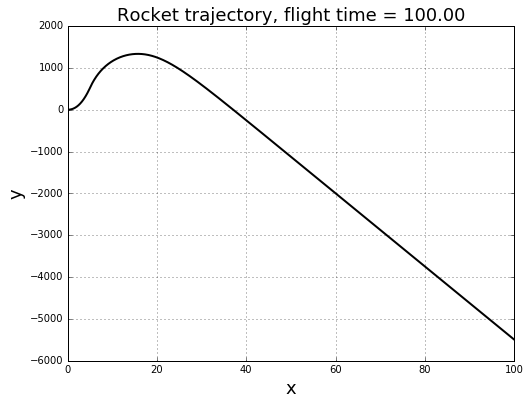

In [10]:
pyplot.figure(figsize=(8, 6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Rocket trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x, y, 'k-', lw=2);


In [11]:
n=1
while u[n+1, 0] > u[n, 0] :
    n=n+1
print u[n, 0]
print n/(10.0)

1334.18294543
15.7


In [14]:
l=1
while u[l+1, 1] > u[l, 1]:
    l=l+1
print u[l,1]
print l/10.0

232.106133413
5.0


In [13]:
l=2
while u[l, 0]> 0 :
    l=l+1
print u[l,1]
print l/(10.0)

-86.0068349838
37.1


In [18]:
m_p_0=100
v_m_p=20
m_p = m_p_0 - v_m_p*0.1*32
print m_p

36.0
